# Impact of CO2 Emission on Global Warming

by Mary Etokwudo, etokwudomary@gmail.com


## Table of contents

1. [Problem Definition](#definition) 

2. [Data Description](#description)  
    i. [Global Temperature Dataset](#global_temp)  
    ii. [CO2 Emission Dataset](#co2_em)

3. [Feature engineering and data processing](#feat_engineering)  
    i. [Global Temperature Dataset](#feat_global_temp)  
    ii. [CO2 Emission Dataset](#feat_co2_em)  
    iii. [Merging the Two Tables](#merging)  
    iv. [Visualisation of features](#visualisation)

4. [Modelling](#modelling)

5. [Results](#results)

6. [Conclusion](#conclusion)

## 1. Problem definition <a id='definition'></a>

The research problem is to find out if there is a correlation between rise in temperature and rise in CO2 emission, using Australia as a case study.

## 2. Data description <a id='description'></a>

This research will make use of two datasets. The global temperature dataset and the CO2 emission dataset. The global temperature dataset is a regional collection of temperature readings. The CO2 dataset is a collection by countries. There is a problem of how to merge the two datasets as it is difficult to determine which countries in the CO2 dataset to place in which region of the temperature dataset. For instance, USA as a country is in the northern hemisphere but there is also the USA48 and USA49 regions (2 regions of the US) shown in the temperature dataset. It becomes tough to know how to classify USA and other countries. Therefore, this research will be focusing on just Australia which is both a region and a country represented in the two datasets.

The following sections give a detailed description of each dataset.

In [27]:
# Importing all required libraries
import pandas as pd
from datetime import datetime

### 2. i. The Global Temperatures Dataset <a id='global_temp'></a>

In [28]:
# Read the Global Temperature Dataset
df_global_temp = pd.read_csv("Global_Temperatures.csv")

In [29]:
# view the dataset
df_global_temp

,Year,Mo,Globe,Land,Ocean,NH,Land.1,Ocean.1,SH,Land.2,...,NoPol,Land.6,Ocean.6,SoPol,Land.7,Ocean.7,USA48,USA49,AUST,Troposphere
0,1978,12.0,-0.48,-0.51,-0.47,-0.44,-0.46,-0.42,-0.52,-0.62,...,-0.39,-0.68,-0.06,-0.45,-0.38,-0.49,-1.29,-1.15,-1.29,Lower
1,1979,1.0,-0.47,-0.64,-0.41,-0.64,-0.86,-0.50,-0.31,-0.13,...,-0.46,-0.95,0.10,-0.16,-0.15,-0.16,-3.22,-2.42,0.92,Lower
2,1979,2.0,-0.43,-0.56,-0.39,-0.47,-0.57,-0.41,-0.39,-0.53,...,-2.01,-2.30,-1.66,-0.80,-1.25,-0.58,-1.76,-1.84,-0.30,Lower
3,1979,3.0,-0.38,-0.51,-0.33,-0.46,-0.51,-0.44,-0.30,-0.53,...,-0.56,-0.47,-0.65,-0.52,-1.25,-0.18,-0.70,-0.39,0.23,Lower
4,1979,4.0,-0.40,-0.57,-0.34,-0.47,-0.62,-0.37,-0.34,-0.46,...,-0.84,-0.81,-0.88,-0.26,0.26,-0.51,-0.72,-0.46,-1.12,Lower
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# view datatype of columns, count of null values, number of rows and columns
df_global_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         2096 non-null   object 
 1   Mo           2096 non-null   float64
 2   Globe        2096 non-null   float64
 3   Land         2096 non-null   float64
 4   Ocean        2096 non-null   float64
 5   NH           2096 non-null   float64
 6   Land.1       2096 non-null   float64
 7   Ocean.1      2096 non-null   float64
 8   SH           2096 non-null   float64
 9   Land.2       2096 non-null   float64
 10  Ocean.2      2096 non-null   float64
 11  Trpcs        2096 non-null   float64
 12  Land.3       2096 non-null   float64
 13  Ocean.3      2096 non-null   float64
 14  NoExt        2096 non-null   float64
 15  Land.4       2096 non-null   float64
 16  Ocean.4      2096 non-null   float64
 17  SoExt        2096 non-null   float64
 18  Land.5       2096 non-null   float64
 19  Ocean.

This dataset has some rows which have NaN in all the columns. This is probably as a result of adding empty rows to the end of the table. They are not visible when viewed in excel spreadsheet and therefore would be dropped in the data processing section.

In [31]:
# Get the list of years
years = df_global_temp['Year'].unique().tolist()
print(years)

['1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '1-Jun', nan]


In [32]:
# Get the list of tropospheres
tropospheres = df_global_temp['Troposphere'].unique().tolist()
print(tropospheres)

['Lower', 'Mid', 'Tropopause', 'Lower Stratosphere', nan]


**Description**  
The global temperature dataset contains the world global temperatures from 1978 to 2022. It has 2096 non-null rows and 30 columns. Each row represents a monthly collection as seen from the `Year` and `Mo` (month) columns. The last column is the `Troposhphere` which has 4 unique values ('Lower', 'Mid', 'Tropopause', 'Lower Stratosphere'). It specifies the troposphere for which the record was taken. The other columns specify the temperature records at different regions of the earth including their respective `Land` and `Ocean` records. All features are numeric except the Year and Troposhphere features. Which are categorical, represented as pandas `object`.

This research will use the following columns:
1. Year and Month: Because the other tables do not have monthly records, the monthly records for this table will be grouped and the average taken to give an annual record for each column.
2. AUST: This column represents Australia as a region and a country this is more specific compared to other columns like NH wich can include a large number of countries.
3. Troposphere: This research will focus on the lower troposphere as it is the troposphere closer to human activities.

### 2. ii. The CO2 Emission Dataset <a id='co2_em'></a>

In [33]:
# read csv file and display dataframe
df_co2_em = pd.read_csv("CO2_emission.csv", encoding= 'unicode_escape')
df_co2_em

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
0,Afghanistan,AF,93,1750,0.0,41128771.0,652230.0,0.40%,63/km²
1,Afghanistan,AF,93,1751,0.0,41128771.0,652230.0,0.40%,63/km²
2,Afghanistan,AF,93,1752,0.0,41128771.0,652230.0,0.40%,63/km²
3,Afghanistan,AF,93,1753,0.0,41128771.0,652230.0,0.40%,63/km²
4,Afghanistan,AF,93,1754,0.0,41128771.0,652230.0,0.40%,63/km²
...,...,...,...,...,...,...,...,...,...
59615,Zimbabwe,ZW,263,2016,736467042.0,16320537.0,390757.0,0.30%,42/km²
59616,Zimbabwe,ZW,263,2017,746048675.0,16320537.0,390757.0,0.30%,42/km²
59617,Zimbabwe,ZW,263,2018,757903042.0,16320537.0,390757.0,0.30%,42/km²
59618,Zimbabwe,ZW,263,2019,768852126.0,16320537.0,390757.0,0.30%,42/km²


In [34]:
# descriptive statistics of the numeric values
df_co2_em.describe()

,Year,CO2 emission (Tons),Population(2022),Area
count,59620.000000,5.962000e+04,5.311600e+04,5.528400e+04
mean,1885.000000,1.034774e+09,3.992260e+07,6.522073e+05
std,78.231085,1.041652e+10,1.482365e+08,1.865483e+06
min,1750.000000,0.000000e+00,1.131200e+04,2.100000e+01
25%,1817.000000,0.000000e+00,1.770414e+06,1.770450e+04
50%,1885.000000,0.000000e+00,8.673095e+06,1.103815e+05
75%,1953.000000,8.715092e+06,2.862920e+07,4.925730e+05
max,2020.000000,4.170000e+11,1.425887e+09,1.709824e+07


In [35]:
# view datatype of columns, count of null values, number of rows and columns
df_co2_em.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59620 entries, 0 to 59619
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              59620 non-null  object 
 1   Code                 57452 non-null  object 
 2   Calling Code         56097 non-null  object 
 3   Year                 59620 non-null  int64  
 4   CO2 emission (Tons)  59620 non-null  float64
 5   Population(2022)     53116 non-null  float64
 6   Area                 55284 non-null  float64
 7   % of World           55284 non-null  object 
 8   Density(km2)         53116 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 4.1+ MB


In [36]:
# check for null values for each column
df_co2_em.isnull().sum()

Country                   0
Code                   2168
Calling Code           3523
Year                      0
CO2 emission (Tons)       0
Population(2022)       6504
Area                   4336
% of World             4336
Density(km2)           6504
dtype: int64

**Description**  
The CO2 emission dataset contains the CO2 emission per country level, which is one of the main drive of global warming. The dataset contains records for the years 1750 to 2020.  
It has 59620 rows and 9 columns. Each row represents a yearly collection for each country as seen from the `Year` and `Country` columns. The `CO2 emission (Tons)` column shows the annual CO2 emission for each country in tons. All other features are not relevant to this research and therefore would be dropped.

The `Country` feature is categorical while the `year` and the `CO2 emission (Tons)` features are numeric. These features do not have null values in their columns.

## 3. Feature engineering and data processing <a id='feat_engineering'></a>

### 3.i. Global Temperature <a id='feat_global_temp'></a>

As stated earlier, there are some rows at the bottom of the dataset that contain null values for all columns. The next step is to drop the rows with NaN values

In [37]:
df_global_temp = df_global_temp.dropna(how='all')

The year feature will be converted from categorical to numeric.

In [38]:
# converting year to a numerical var
# df_global_temp[['Year']].astype(int)

Running the line of code above threw the error: `invalid literal for int() with base 10: '1-Jun'`, and the conversion was not working because of this. The next step will be to check for the years that have such values.

In [39]:
# Get list of years
years = df_global_temp['Year'].unique().tolist()
print(years)

['1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '1-Jun']


In [40]:
# checking which rows have year to be '1-Jun'
df_global_temp.loc[df_global_temp['Year'] == '1-Jun']

,Year,Mo,Globe,Land,Ocean,NH,Land.1,Ocean.1,SH,Land.2,...,NoPol,Land.6,Ocean.6,SoPol,Land.7,Ocean.7,USA48,USA49,AUST,Troposphere
1578,1-Jun,6.0,0.98,1.01,0.97,1.17,1.25,1.13,0.79,0.48,...,1.15,1.29,0.98,-0.22,-0.36,-0.15,1.44,1.34,1.44,Lower Stratosphere
1579,1-Jun,7.0,0.81,0.90,0.77,0.83,0.96,0.76,0.78,0.77,...,1.05,1.11,0.99,0.44,0.20,0.55,1.25,1.16,1.05,Lower Stratosphere


In [41]:
# checking other rows around them to see the years around them
df_global_temp.iloc[1573:1585]

,Year,Mo,Globe,Land,Ocean,NH,Land.1,Ocean.1,SH,Land.2,...,NoPol,Land.6,Ocean.6,SoPol,Land.7,Ocean.7,USA48,USA49,AUST,Troposphere
1573,1979,1.0,1.14,1.19,1.12,0.99,1.32,0.79,1.29,0.89,...,-1.95,-1.45,-2.52,1.14,1.00,1.21,2.34,1.77,0.39,Lower Stratosphere
1574,1979,2.0,0.92,1.03,0.88,1.28,1.38,1.21,0.56,0.22,...,4.00,3.65,4.41,0.81,0.77,0.82,1.61,2.13,0.35,Lower Stratosphere
1575,1979,3.0,0.99,1.32,0.85,1.09,1.61,0.76,0.88,0.67,...,4.36,4.38,4.33,0.96,1.07,0.90,0.59,0.47,0.56,Lower Stratosphere
1576,1979,4.0,1.09,1.02,1.12,0.89,0.89,0.89,1.29,1.34,...,1.09,0.88,1.34,0.83,1.04,0.73,0.96,0.43,2.22,Lower Stratosphere
1577,1979,5.0,1.12,1.17,1.11,1.22,1.22,1.21,1.03,1.07,...,0.64,0.57,0.71,0.04,0.26,-0.06,1.89,1.78,1.41,Lower Stratosphere
1578,1-Jun,6.0,0.98,1.01,0.97,1.17,1.25,1.13,0.79,0.48,...,1.15,1.29,0.98,-0.22,-0.36,-0.15,1.44,1.34,1.44,Lower Stratosphere
1579,1-Jun,7.0,0.81,0.90,0.77,0.83,0.96,0.76,0.78,0.77,...,1.05,1.11,0.99,0.44,0.20,0.55,1.25,1.16,1.05,Lower Stratosphere
1580,1979,8.0,0.74,0.87,0.68,0.97,1.00,0.95,0.50,0.58,...,1.30,1.34,1.26,-0.53,-0.46,-0.56,1.34,1.12,1.05,Lower Stratosphere
1581,1979,9.0,0.75,0.85,0.71,0.98,0.98,0.98,0.52,0.53,...,1.11,0.94,1.31,-0.25,-0.36,-0.20,0.42,0.48,1.20,Lower Stratosphere
1582,1979,10.0,0.81,1.14,0.68,0.26,0.67,-0.01,1.36,2.19,...,0.88,1.06,0.68,6.56,9.71,5.06,0.62,0.81,0.20,Lower Stratosphere


The years and months show that the 6th and 7th months of 1979 are missing and the year 1979 may have been errorneously written as 1-Jun for those rows. The year cells for those rows will be replace with 1979.

In [42]:
# replacing '1-Jun' with the right year
df_global_temp['Year'] = df_global_temp['Year'].replace("1-Jun", '1979')


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
# converting year to a numerical var
df_global_temp['Year'] = df_global_temp[['Year']].astype(int)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


**Dropping all non required columns**

In [44]:
# get all columns
df_global_temp.columns

Index(['Year', 'Mo', 'Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH',
       'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4',
       'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6',
       'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST', 'Troposphere'],
      dtype='object')

At certain intervals in this research, copies of the datasets will be made to save progress and be able to revert to recent versions.

In [45]:
# create a copy to avoid losing progress
df_global_temp1 = df_global_temp.copy()

In [46]:
# drop non required columns and filter dataset for only Australia
df_global_temp1.drop(labels=df_global_temp.columns.difference(
    ['Year', 'Mo', 'AUST', 'Troposphere']), axis=1, inplace=True)

In [47]:
df_global_temp1

,Year,Mo,AUST,Troposphere
0,1978,12.0,-1.29,Lower
1,1979,1.0,0.92,Lower
2,1979,2.0,-0.30,Lower
3,1979,3.0,0.23,Lower
4,1979,4.0,-1.12,Lower
...,...,...,...,...
2091,2022,3.0,0.56,Lower Stratosphere
2092,2022,4.0,-0.57,Lower Stratosphere
2093,2022,5.0,-0.02,Lower Stratosphere
2094,2022,6.0,-0.35,Lower Stratosphere


**Data Aggregation**  
The table still contains monthly data whereas the aim is to get annual data that would make it easier to merge the annual data from the second table.

In [48]:
# Group the dataset by years and troposphere (to retain data for each troposphere),
# and take the average of the grouped data
aust_annual_temp = df_global_temp1.groupby(
    ["Year","Troposphere"], as_index=False).agg(temperature = ("AUST", "mean"))
aust_annual_temp.head()

,Year,Troposphere,temperature
0,1978,Lower,-1.2900
1,1978,Lower Stratosphere,2.9700
2,1978,Mid,-1.0500
3,1978,Tropopause,-0.5500
4,1979,Lower,-0.4575


In [49]:
# selecting the rows for the lower troposphere
filtered_df_global_temp = aust_annual_temp.loc[(aust_annual_temp['Troposphere']  == 'Lower')]
filtered_df_global_temp.reset_index(drop=True, inplace=True)
filtered_df_global_temp

,Year,Troposphere,temperature
0,1978,Lower,-1.290000
1,1979,Lower,-0.457500
2,1980,Lower,0.052500
3,1981,Lower,-0.347500
4,1982,Lower,-0.597500
5,1983,Lower,-0.435000
6,1984,Lower,-0.669167
7,1985,Lower,-0.555000
8,1986,Lower,-0.547500
9,1987,Lower,-0.486667


### 3.ii. CO2 Emission <a id='feat_co2_em'></a>

The first step here is to drop the columns that are not necessary for this research.

In [50]:
# get all columns
df_co2_em.columns

Index(['Country', 'Code', 'Calling Code', 'Year', 'CO2 emission (Tons)',
       'Population(2022)', 'Area', '% of World', 'Density(km2)'],
      dtype='object')

In [51]:
# drop all columns except Country, Year and CO2 emission (Tons)
df_co2_em.drop(
    labels=df_co2_em.columns.difference(['Country', 'Year','CO2 emission (Tons)']),
    axis=1, inplace=True)
df_co2_em

,Country,Year,CO2 emission (Tons)
0,Afghanistan,1750,0.0
1,Afghanistan,1751,0.0
2,Afghanistan,1752,0.0
3,Afghanistan,1753,0.0
4,Afghanistan,1754,0.0
...,...,...,...
59615,Zimbabwe,2016,736467042.0
59616,Zimbabwe,2017,746048675.0
59617,Zimbabwe,2018,757903042.0
59618,Zimbabwe,2019,768852126.0


In [52]:
# filter dataset for only Australia and from the year 1979
filtered_df_co2_em = df_co2_em.loc[
    ((df_co2_em['Country'] == 'Australia')) & (df_co2_em['Year'] >= 1979)]
filtered_df_co2_em.reset_index(drop=True, inplace=True)
filtered_df_co2_em

,Country,Year,CO2 emission (Tons)
0,Australia,1979,4.840752e+09
1,Australia,1980,5.061290e+09
2,Australia,1981,5.291430e+09
3,Australia,1982,5.525327e+09
4,Australia,1983,5.750119e+09
5,Australia,1984,5.986489e+09
6,Australia,1985,6.227488e+09
7,Australia,1986,6.467221e+09
8,Australia,1987,6.723083e+09
9,Australia,1988,6.983975e+09


### 3.iii. Merging the two datasets <a id='merging'></a>

The pandas merge method would be used to merge the two tables on the `Year` column.   
An inner merge will ensure that only the years common to both tables are selected.

In [53]:
df_temp_and_co2 = pd.merge(
    filtered_df_global_temp, filtered_df_co2_em, on=["Year"], how='inner')
df_temp_and_co2

,Year,Troposphere,temperature,Country,CO2 emission (Tons)
0,1979,Lower,-0.457500,Australia,4.840752e+09
1,1980,Lower,0.052500,Australia,5.061290e+09
2,1981,Lower,-0.347500,Australia,5.291430e+09
3,1982,Lower,-0.597500,Australia,5.525327e+09
4,1983,Lower,-0.435000,Australia,5.750119e+09
5,1984,Lower,-0.669167,Australia,5.986489e+09
6,1985,Lower,-0.555000,Australia,6.227488e+09
7,1986,Lower,-0.547500,Australia,6.467221e+09
8,1987,Lower,-0.486667,Australia,6.723083e+09
9,1988,Lower,0.040000,Australia,6.983975e+09


**Dropping the non required columns**  
At this point, the troposphere and country columns can be dropped as they are no longer needed for further analysis.

In [54]:
# drop all columns except Year, temperature' and CO2 emission (Tons)
df_temp_and_co2.drop(
    labels=df_temp_and_co2.columns.difference(['Year','temperature', 'CO2 emission (Tons)']),
    axis=1, inplace=True)
df_temp_and_co2.head()

,Year,temperature,CO2 emission (Tons)
0,1979,-0.4575,4.840752e+09
1,1980,0.0525,5.061290e+09
2,1981,-0.3475,5.291430e+09
3,1982,-0.5975,5.525327e+09
4,1983,-0.4350,5.750119e+09


**Rename columns and divide co2 values by 10^9 to remove the exponent**

In [55]:
df_temp_and_co2['co2'] = df_temp_and_co2['CO2 emission (Tons)']/1000000000

In [56]:
df_temp_and_co2.rename(columns={'Year': 'year'}, inplace=True, errors='raise')

In [57]:
df_temp_and_co2.drop(labels='CO2 emission (Tons)', axis=1, inplace=True) 

In [58]:
df_temp_and_co2.head()

,year,temperature,co2
0,1979,-0.4575,4.840752
1,1980,0.0525,5.061290
2,1981,-0.3475,5.291430
3,1982,-0.5975,5.525327
4,1983,-0.4350,5.750119


### 3.iv Visualisation of features <a id='visualisation'></a>

Since the dataset is temporal, visualising the timeseries can help to understand the annual trend of each feature. 

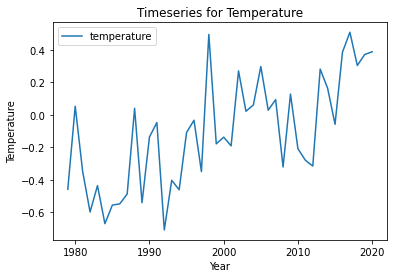

In [59]:
# temperature trend
df_temp_and_co2.plot(
    x='year' , y='temperature', 
    xlabel='Year', ylabel='Temperature', title='Timeseries for Temperature');

Although there are up and down flunctuations in the trend above, overall, there is a upward trend observed from 1979 to 2020.

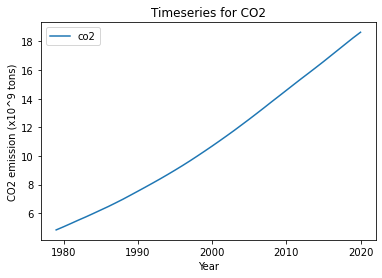

In [60]:
# CO2 trend
df_temp_and_co2.plot(
    x='year' , y="co2", xlabel='Year',
    ylabel='CO2 emission (x10^9 tons)', title='Timeseries for CO2');

There is an upward trend for CO2 emission in Australia.

## 4. Modelling <a id='modelling'></a>

The linear regression model will be used here to find out if there is a correlation between CO2 emission and temperature in Australia.

Using Seaborn's inbuilt linear regression model

In [61]:
import seaborn as sns
import scipy as sp

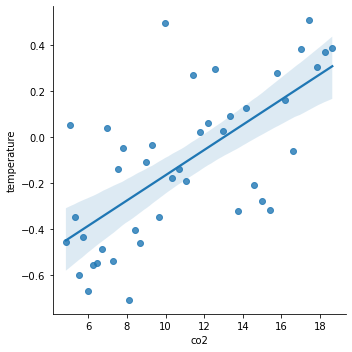

In [62]:
#scatterplot with linear regression line
sns.lmplot(data=df_temp_and_co2, x='co2', y='temperature');

To determine how well the data fit the regression model, the r_squared value needs to be calculated. The Scipy library can be used to get the r_squared (R^2) value of the linear regression model, as well as other properties such as p_value and standard error.

In [63]:
x = df_temp_and_co2['co2']
y = df_temp_and_co2['temperature']

In [64]:

slope, intercept, r_value, p_value, std_err = sp.stats.linregress(x, y)
r_square = r_value**2
print('slope = ' + str(slope))
print('intercept = ' + str(intercept))
print('r_squared = ' + str(r_square))
print('p_value = ' + str(p_value))
print('std_err = ' + str(std_err))

slope = 0.05488612556154732
intercept = -0.714781110150336
r_squared = 0.465334602564335
p_value = 6.527722092421684e-07
std_err = 0.009302312910906552


The R^2 value is 0.465 which is not a bad fit. Doing a polynomial regression may produce a better model. The next steps involve using numpy to create two polynomial models, degree 2 and 3.

In [65]:
import numpy
from sklearn.metrics import r2_score

In [66]:
mymodel = numpy.poly1d(numpy.polyfit(x, y, 2))

print(r2_score(y, mymodel(x)))

0.46538573363944735


In [67]:
mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

print(r2_score(y, mymodel(x)))

0.4730295030580103


The polynomial regression is also producing a similar r_squared score which means that a linear regression is fine and there won't be a need to go further with polynomial regression.

## 5. Results <a id='results'></a>


From the linear regression plot above, it is obvious that there is a positive linear correlation between temperature and CO2 emission.

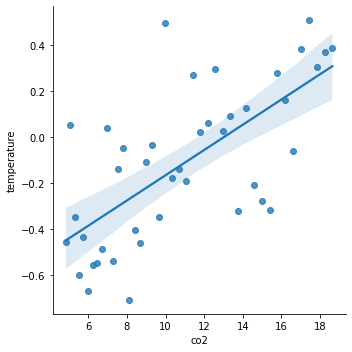

In [68]:
sns.lmplot(data=df_temp_and_co2, x='co2', y='temperature');

## 6. Conclusion <a id='conclusion'></a>


The aim of this research was to find out if there is a correlation between rise in temperature and rise in CO2 emission, using Australia as a case study. Two datasets were filtered to form a final dataset which had two features: temperature and CO2 emission for Australia. The linear regression model was used to fit a line that showed a positive correlation with a data fit of 46.5%. Even though the fit was not high, other regression methods like polynomial regression did not make any significant difference. Therefore the conlusion is that a linear correlation exists between temperature and CO2 emission.

The limitations of this research are as follows:  
1. A small number of observations: A larger number of observations would have provided a larger training data for a better performing model. If the CO2 table had a monthly record like the temperature table, then the final dataset would have had more observations, thereby leading to a better performing model. The model would have scored better if this was the case.
2. The limitation of not working with other countries: The CO2 dataset is rich in country data but this research focused on just one country - Australia. This is because it was difficult to merge the two tables as they did not have common country columns. 